In [2]:
import numpy as np
from astropy.table import Table, vstack

In [6]:
import corner as DFM
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline 

## which communities have more flood losses in the future

In [49]:
def flood_loss_split(city): 
    dloss = city['flood_loss.2052'] - city['flood_loss.2022']
    
    _range = (0, 100)

    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['flood_risk100.2022'][dloss < 0], range=_range, bins=20, color='C0', alpha=0.5, density=True, label='Less Loss')
    sub.hist(city['flood_risk100.2022'][dloss >= 0], range=_range, bins=20, color='C1', alpha=0.5, density=True, label='More Loss')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('Flood Risk', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    _range = (0, 3e5)

    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['income.2022'][dloss < 0], range=_range, bins=20, density=True, color='C0', alpha=0.5, label='Less Loss')
    sub.hist(city['income.2022'][dloss >= 0], range=_range, bins=20, density=True, color='C1', alpha=0.5, label='More Loss')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('income', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    _range = (0, 1.5e5)

    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['population.2022'][dloss < 0], range=_range, bins=20, density=True, color='C0', alpha=0.5, label='Less Loss')
    sub.hist(city['population.2022'][dloss >= 0], range=_range, bins=20, density=True, color='C1', alpha=0.5, label='More Loss')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('population', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    _range = (0, 1.)
    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['renter_fraction.2022'][dloss < 0], range=_range, bins=20, density=True, color='C0', alpha=0.5, label='Less Loss')
    sub.hist(city['renter_fraction.2022'][dloss >= 0], range=_range, bins=20, density=True, color='C1', alpha=0.5, label='More Loss')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('renter fraction', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['educated_fraction.2022'][dloss < 0], range=_range, bins=20, density=True, color='C0', alpha=0.5, label='Less Loss')
    sub.hist(city['educated_fraction.2022'][dloss >= 0], range=_range, bins=20, density=True, color='C1', alpha=0.5, label='More Loss')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('educated fraction', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['white_fraction.2022'][dloss < 0], range=_range, bins=20, density=True, color='C0', alpha=0.5, label='Less Loss')
    sub.hist(city['white_fraction.2022'][dloss >= 0], range=_range, bins=20, density=True, color='C1', alpha=0.5, label='More Loss')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('white fraction', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    return None

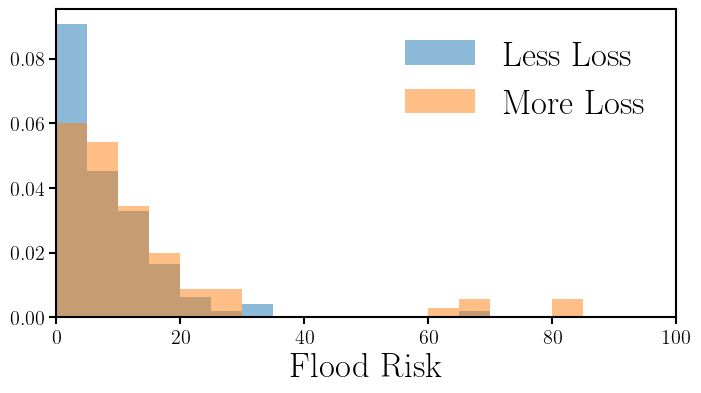

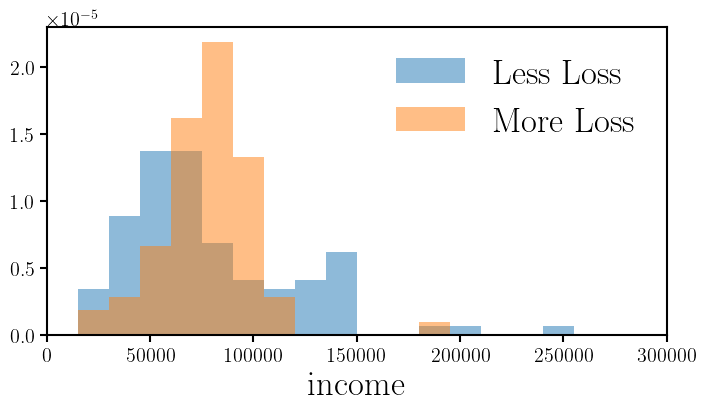

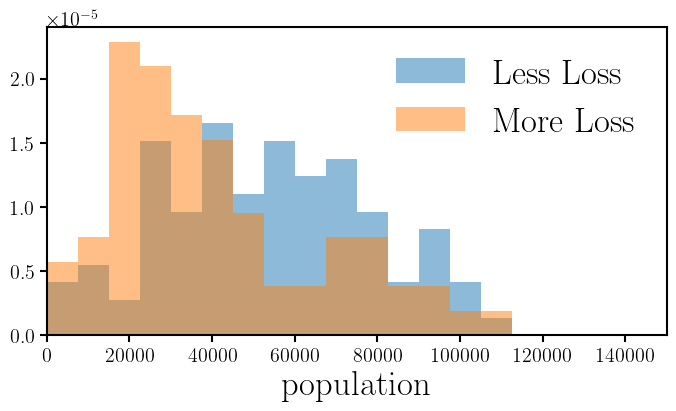

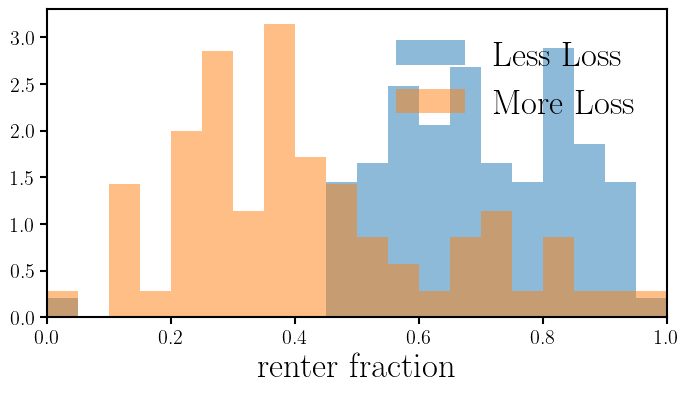

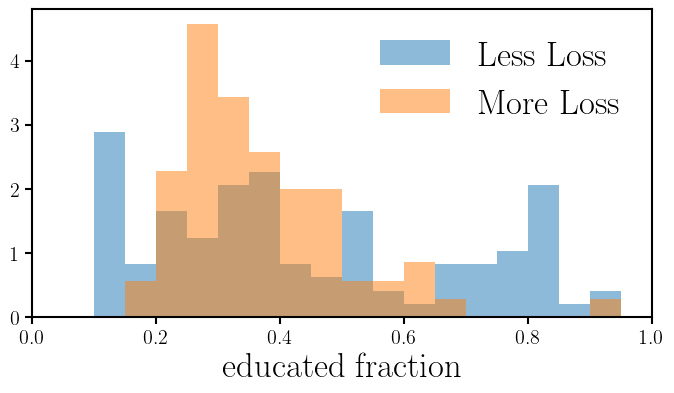

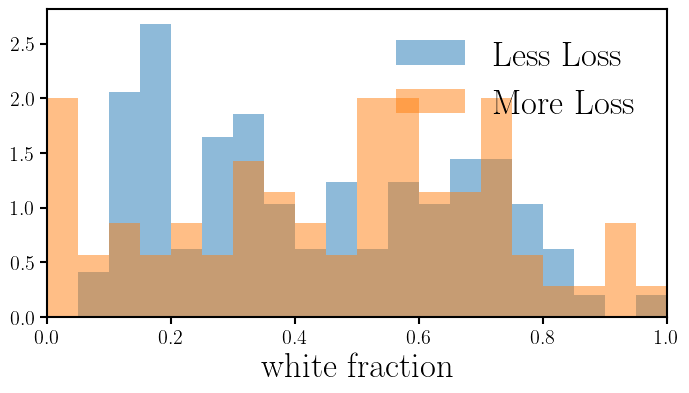

In [50]:
nyc = Table.read('/scratch/gpfs/chhahn/noah/floody/floody.newyorkcity.v0.hdf5')
flood_loss_split(nyc)

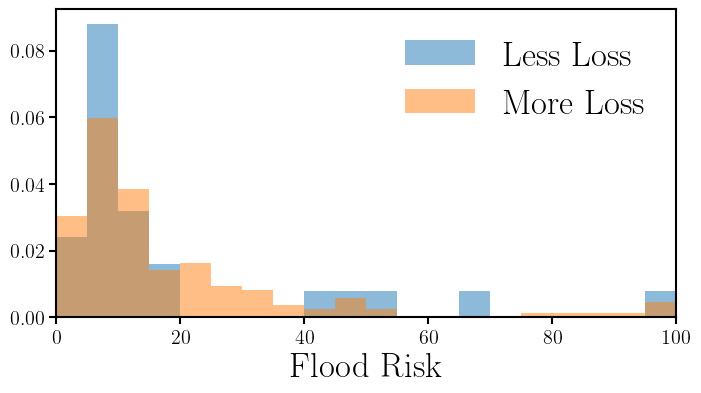

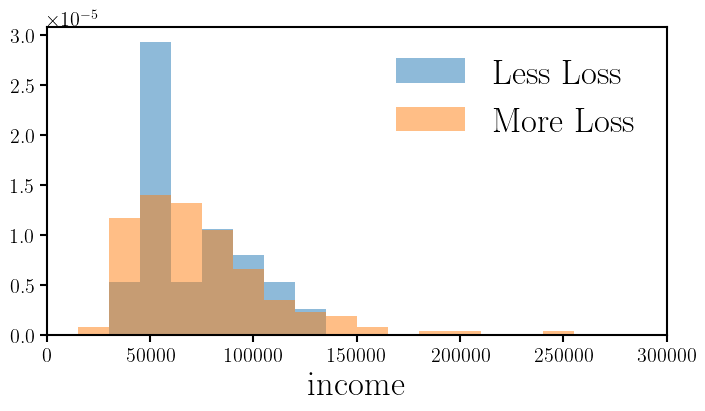

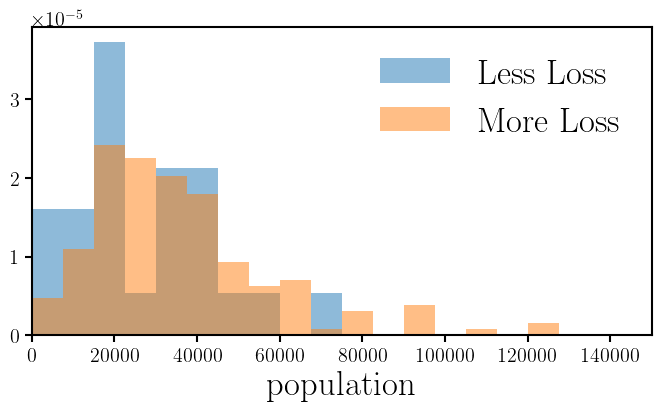

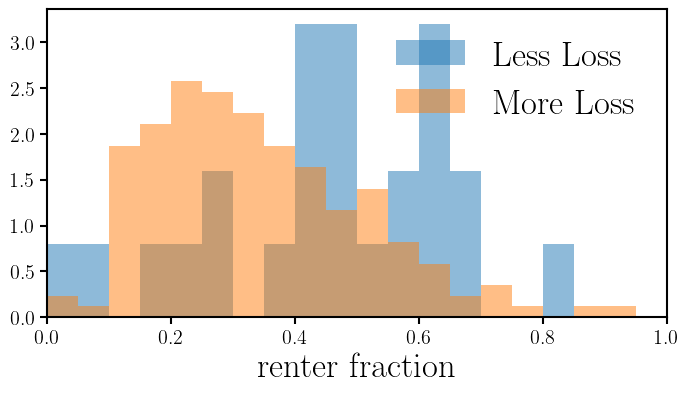

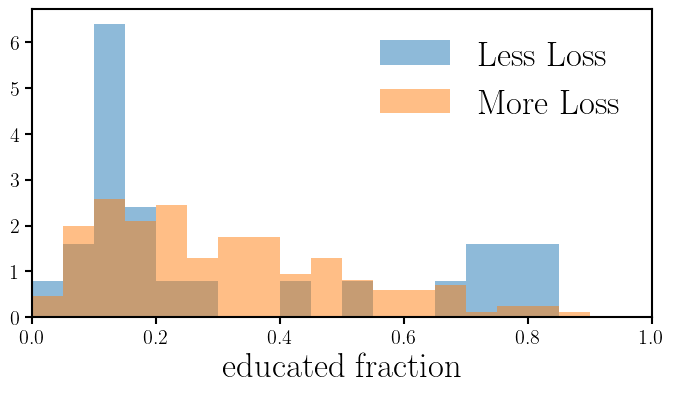

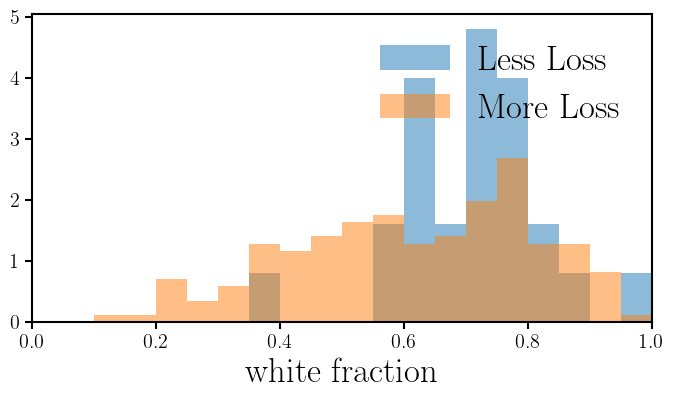

In [51]:
houston = Table.read('/scratch/gpfs/chhahn/noah/floody/floody.houston.v0.hdf5')
flood_loss_split(houston)

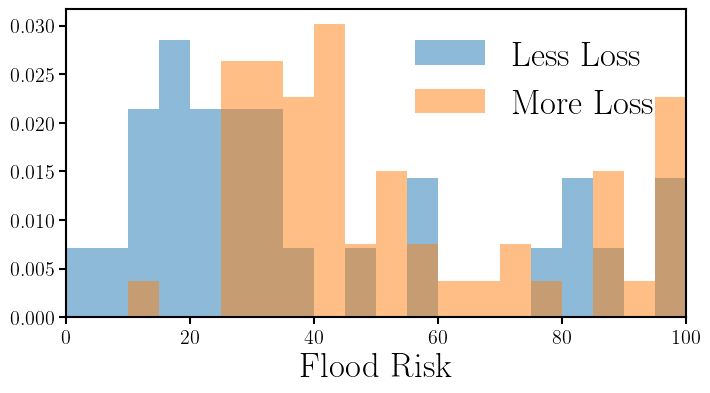

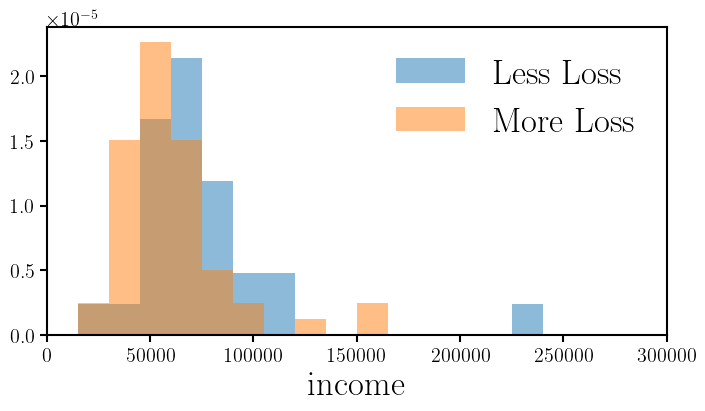

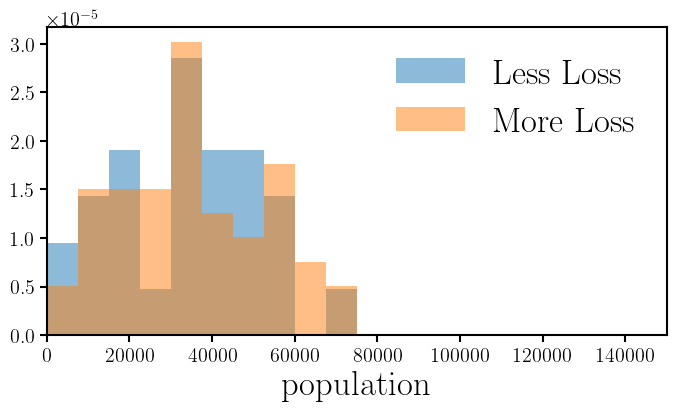

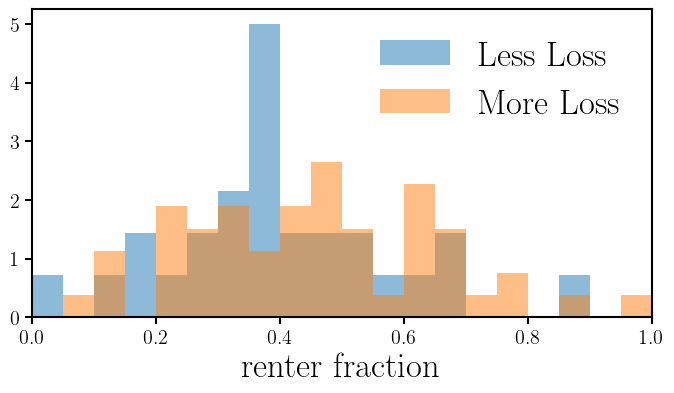

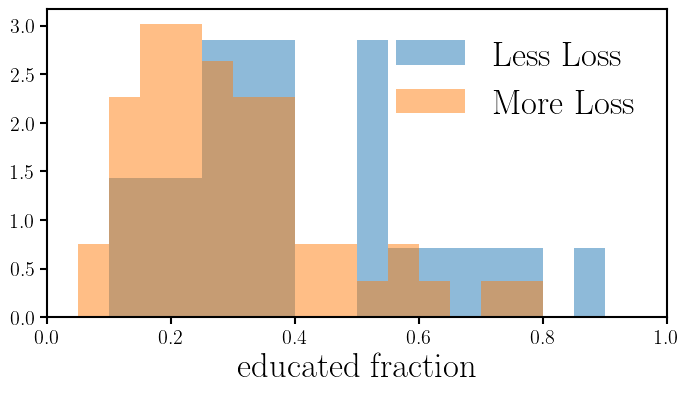

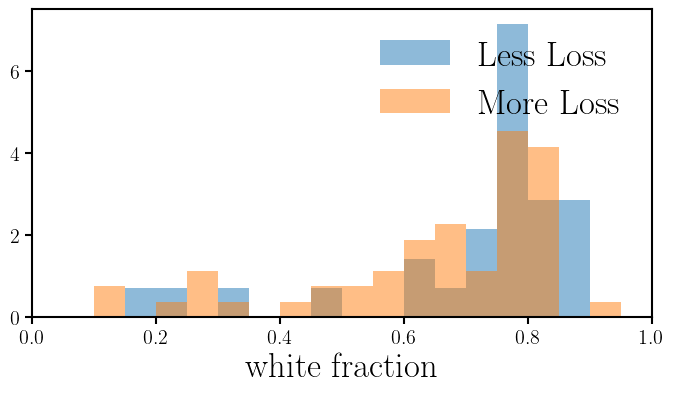

In [52]:
miami = Table.read('/scratch/gpfs/chhahn/noah/floody/floody.miami.v0.hdf5')
flood_loss_split(miami)

In [56]:
cities = Table.read('/scratch/gpfs/chhahn/noah/floody/floody.newyorkcity.v0.hdf5')
for name in ['neworleans', 'capecoral', 'chicago', 'losangeles', 'miami', 'houston']: 
    _city = Table.read('/scratch/gpfs/chhahn/noah/floody/floody.%s.v0.hdf5' % name)
    cities = vstack([cities, _city])

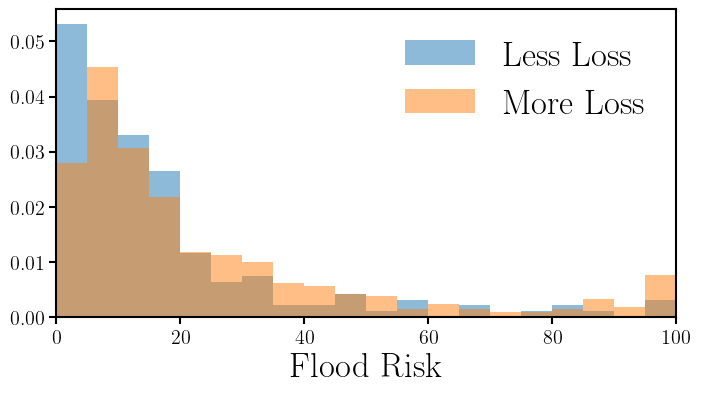

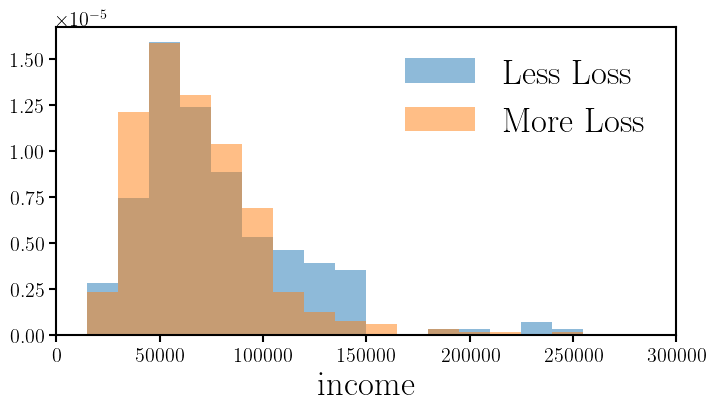

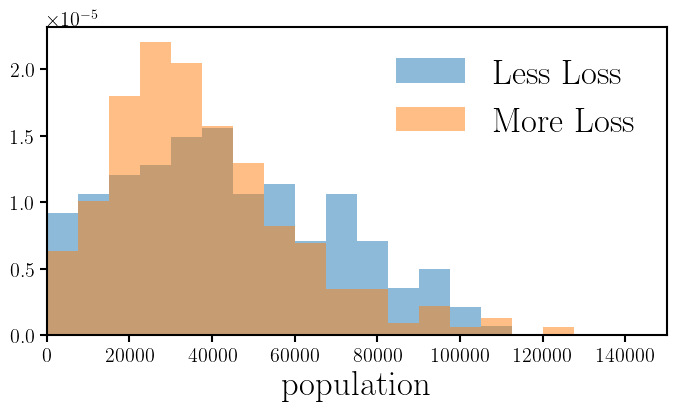

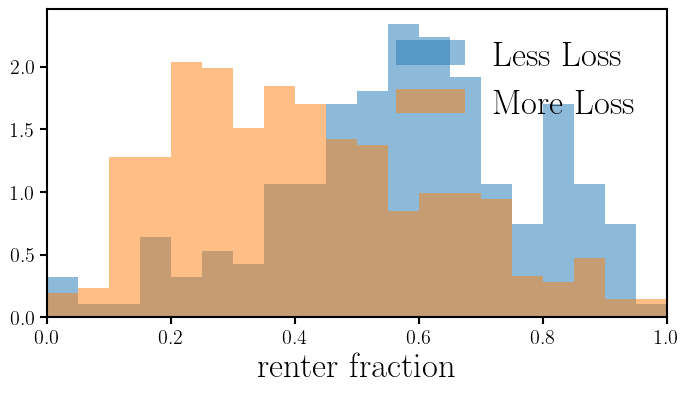

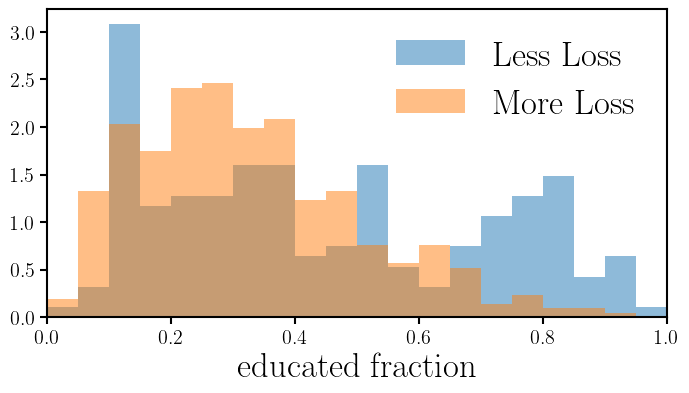

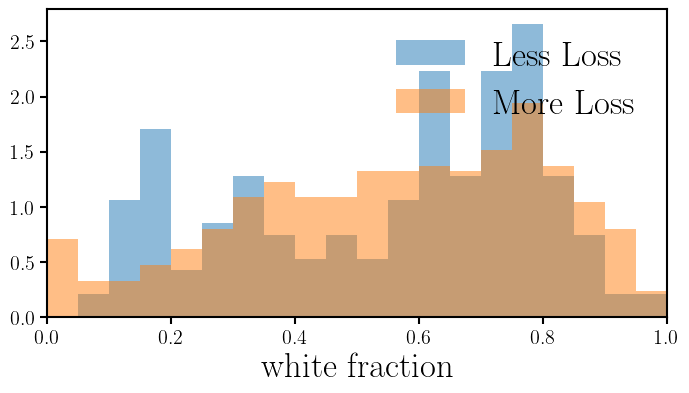

In [58]:
flood_loss_split(cities)

In [88]:
np.quantile((cities['flood_loss.2052'] - cities['flood_loss.2022']), (0.16, 0.5, 0.84))

-165.201171875
142.83740234375
493.6681640624994


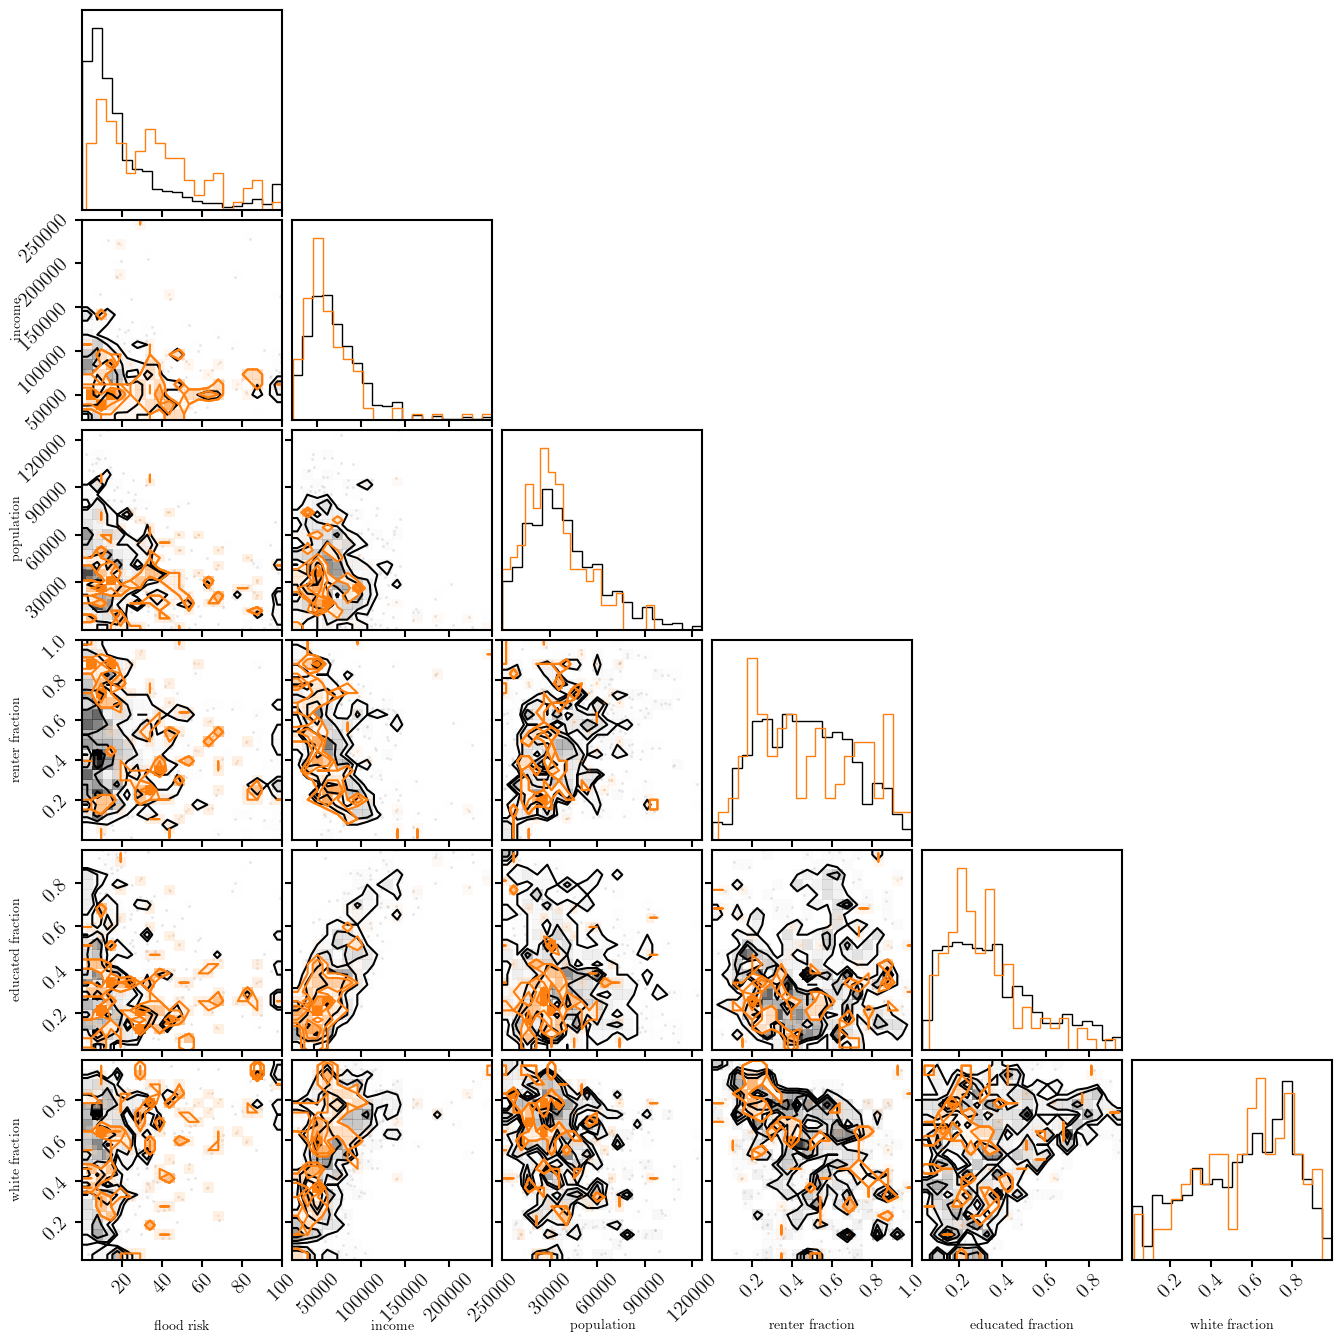

In [89]:
props = np.array([np.array(cities[col]) for col in ['flood_risk100.2022', 'income.2022', 'population.2022', 'renter_fraction.2022', 'educated_fraction.2022', 'white_fraction.2022']]).T
fig = DFM.corner(props, labels=['flood risk', 'income', 'population', 'renter fraction', 'educated fraction', 'white fraction'], 
                hist_kwargs={'density': True})
fig = DFM.corner(props[(cities['flood_loss.2052'] - cities['flood_loss.2022']) > 400.], labels=['flood risk', 'income', 'population', 'renter fraction', 'educated fraction', 'white fraction'],                 
                 hist_kwargs={'density': True}, color='C1', fig=fig)
#DFM.overplot_points(fig, props[(cities['crs_saving.2052'] - cities['crs_saving.2022']) < 0.], color='C1')

## which communities save more on CRS 

In [72]:
def crs_saving_split(city): 
    dloss = city['crs_saving.2052'] - city['crs_saving.2022']
    
    _range = (0, 100)

    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['flood_risk100.2022'][dloss < 0], range=_range, bins=20, color='C0', alpha=0.5, density=True, label='Less Saving')
    sub.hist(city['flood_risk100.2022'][dloss >= 0], range=_range, bins=20, color='C1', alpha=0.5, density=True, label='More Saving')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('Flood Risk 2022', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['flood_risk100.2052'][dloss < 0], range=_range, bins=20, color='C0', alpha=0.5, density=True, label='Less Saving')
    sub.hist(city['flood_risk100.2052'][dloss >= 0], range=_range, bins=20, color='C1', alpha=0.5, density=True, label='More Saving')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('Flood Risk 2052', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    _range = (0, 50)
    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist((city['flood_risk100.2052'] - city['flood_risk100.2022'])[dloss < 0], range=_range, bins=20, color='C0', alpha=0.5, density=True, label='Less Saving')
    sub.hist((city['flood_risk100.2052'] - city['flood_risk100.2022'])[dloss >= 0], range=_range, bins=20, color='C1', alpha=0.5, density=True, label='More Saving')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('Flood Risk Difference', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    _range = (0, 500)

    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['precip.2022'][dloss < 0], range=_range, bins=20, color='C0', alpha=0.5, density=True, label='Less Saving')
    sub.hist(city['precip.2022'][dloss >= 0], range=_range, bins=20, color='C1', alpha=0.5, density=True, label='More Saving')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('Preciptation 2022', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['precip.2052'][dloss < 0], range=_range, bins=20, color='C0', alpha=0.5, density=True, label='Less Saving')
    sub.hist(city['precip.2052'][dloss >= 0], range=_range, bins=20, color='C1', alpha=0.5, density=True, label='More Saving')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('Preciptation 2052', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    _range = (0, 50)

    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist((city['precip.2052'] - city['precip.2022'])[dloss < 0], range=_range, bins=20, color='C0', alpha=0.5, density=True, label='Less Saving')
    sub.hist((city['precip.2052'] - city['precip.2022'])[dloss >= 0], range=_range, bins=20, color='C1', alpha=0.5, density=True, label='More Saving')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('Preciptation Difference', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    _range = (0, 3e5)

    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['income.2022'][dloss < 0], range=_range, bins=20, density=True, color='C0', alpha=0.5, label='Less Saving')
    sub.hist(city['income.2022'][dloss >= 0], range=_range, bins=20, density=True, color='C1', alpha=0.5, label='More Saving')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('income', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    _range = (0, 1.5e5)

    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['population.2022'][dloss < 0], range=_range, bins=20, density=True, color='C0', alpha=0.5, label='Less Saving')
    sub.hist(city['population.2022'][dloss >= 0], range=_range, bins=20, density=True, color='C1', alpha=0.5, label='More Saving')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('population', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    _range = (0, 1.)
    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['renter_fraction.2022'][dloss < 0], range=_range, bins=20, density=True, color='C0', alpha=0.5, label='Less Saving')
    sub.hist(city['renter_fraction.2022'][dloss >= 0], range=_range, bins=20, density=True, color='C1', alpha=0.5, label='More Saving')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('renter fraction', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['educated_fraction.2022'][dloss < 0], range=_range, bins=20, density=True, color='C0', alpha=0.5, label='Less Saving')
    sub.hist(city['educated_fraction.2022'][dloss >= 0], range=_range, bins=20, density=True, color='C1', alpha=0.5, label='More Saving')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('educated fraction', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    
    fig = plt.figure(figsize=(8,4))
    sub = fig.add_subplot(111)
    sub.hist(city['white_fraction.2022'][dloss < 0], range=_range, bins=20, density=True, color='C0', alpha=0.5, label='Less Saving')
    sub.hist(city['white_fraction.2022'][dloss >= 0], range=_range, bins=20, density=True, color='C1', alpha=0.5, label='More Saving')
    sub.legend(loc='upper right', fontsize=25)
    sub.set_xlabel('white fraction', fontsize=25)
    sub.set_xlim(_range)
    plt.show()
    return None

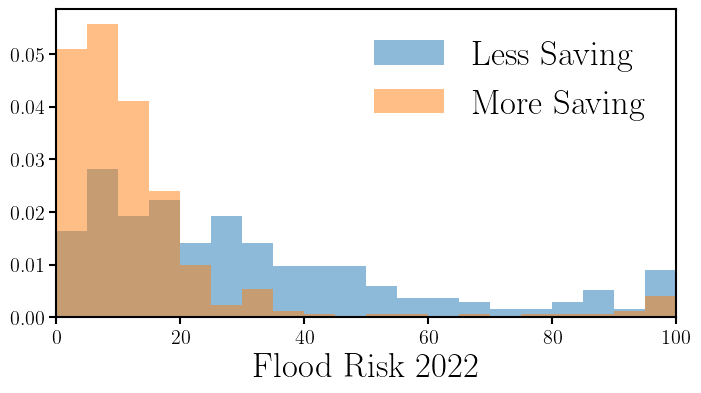

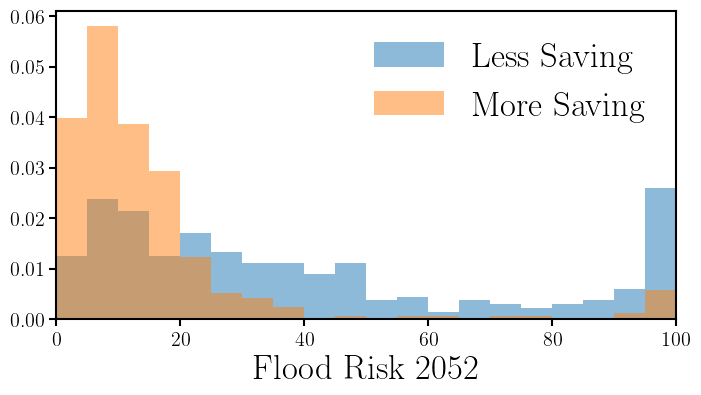

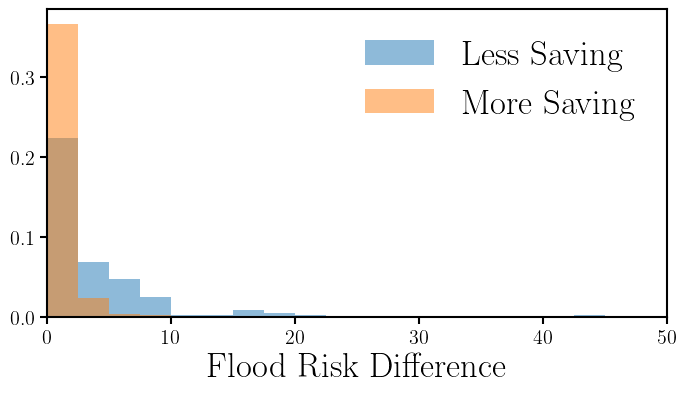

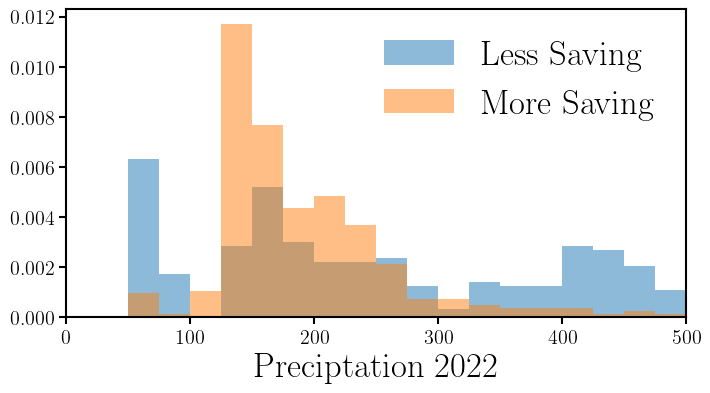

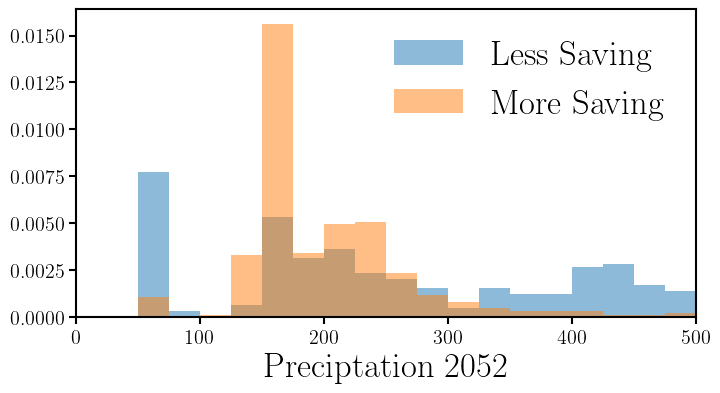

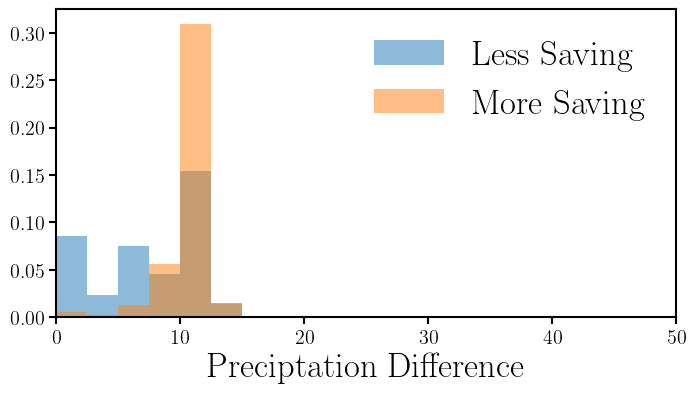

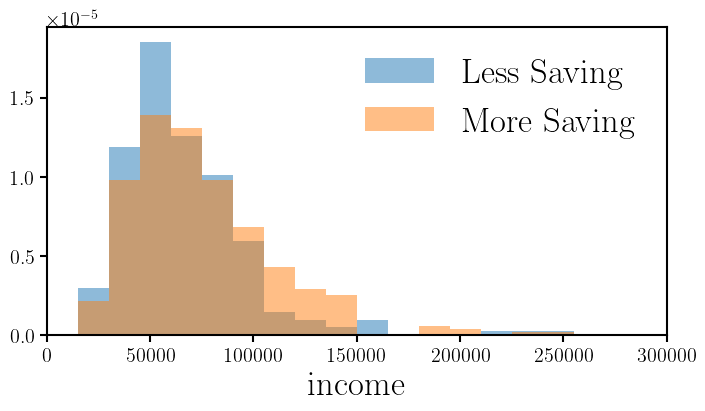

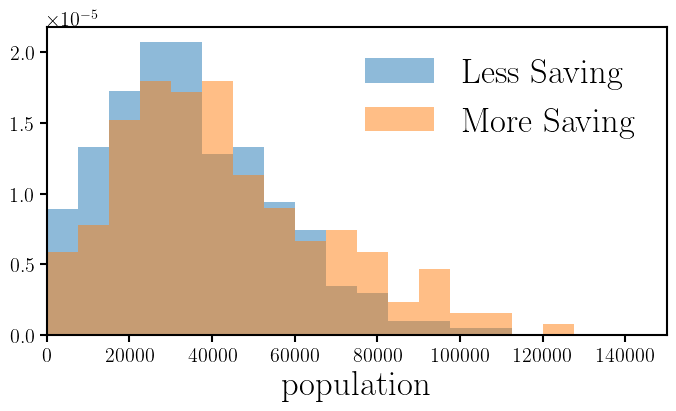

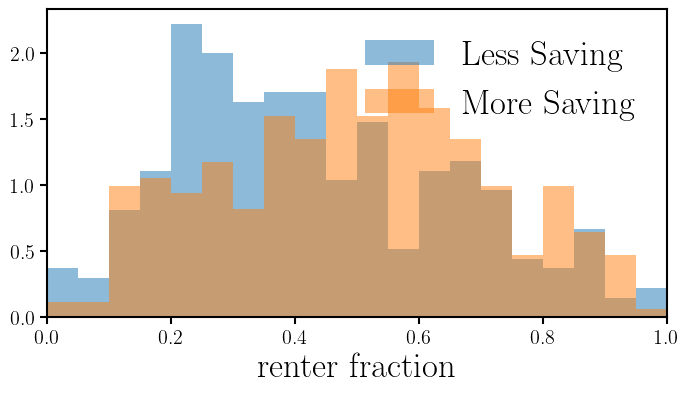

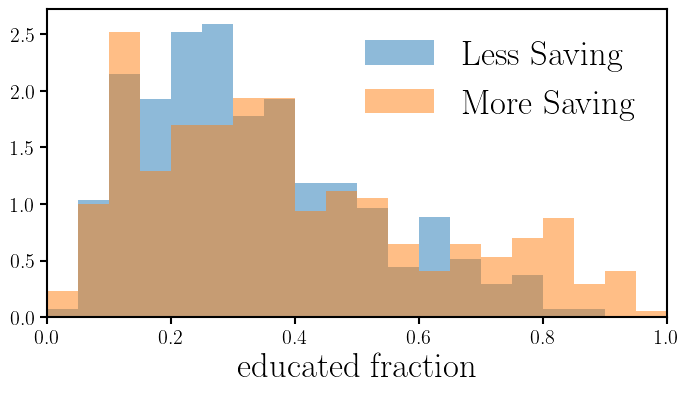

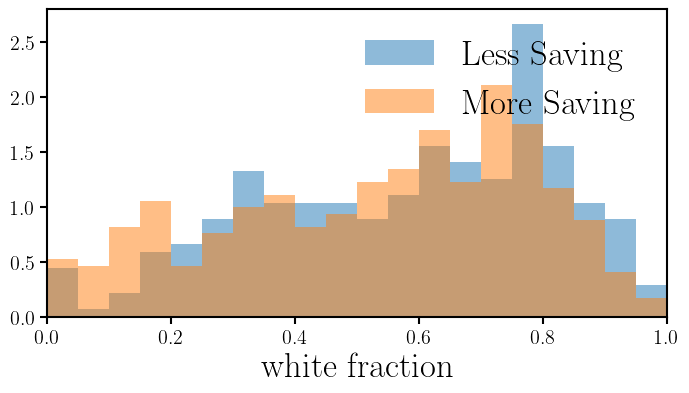

In [73]:
crs_saving_split(cities)

In [83]:
np.quantile((cities['crs_saving.2052'] - cities['crs_saving.2022']), [0.16, 0.5, 0.84])

-1048.9761718749999
88.634765625
977.8703124999997


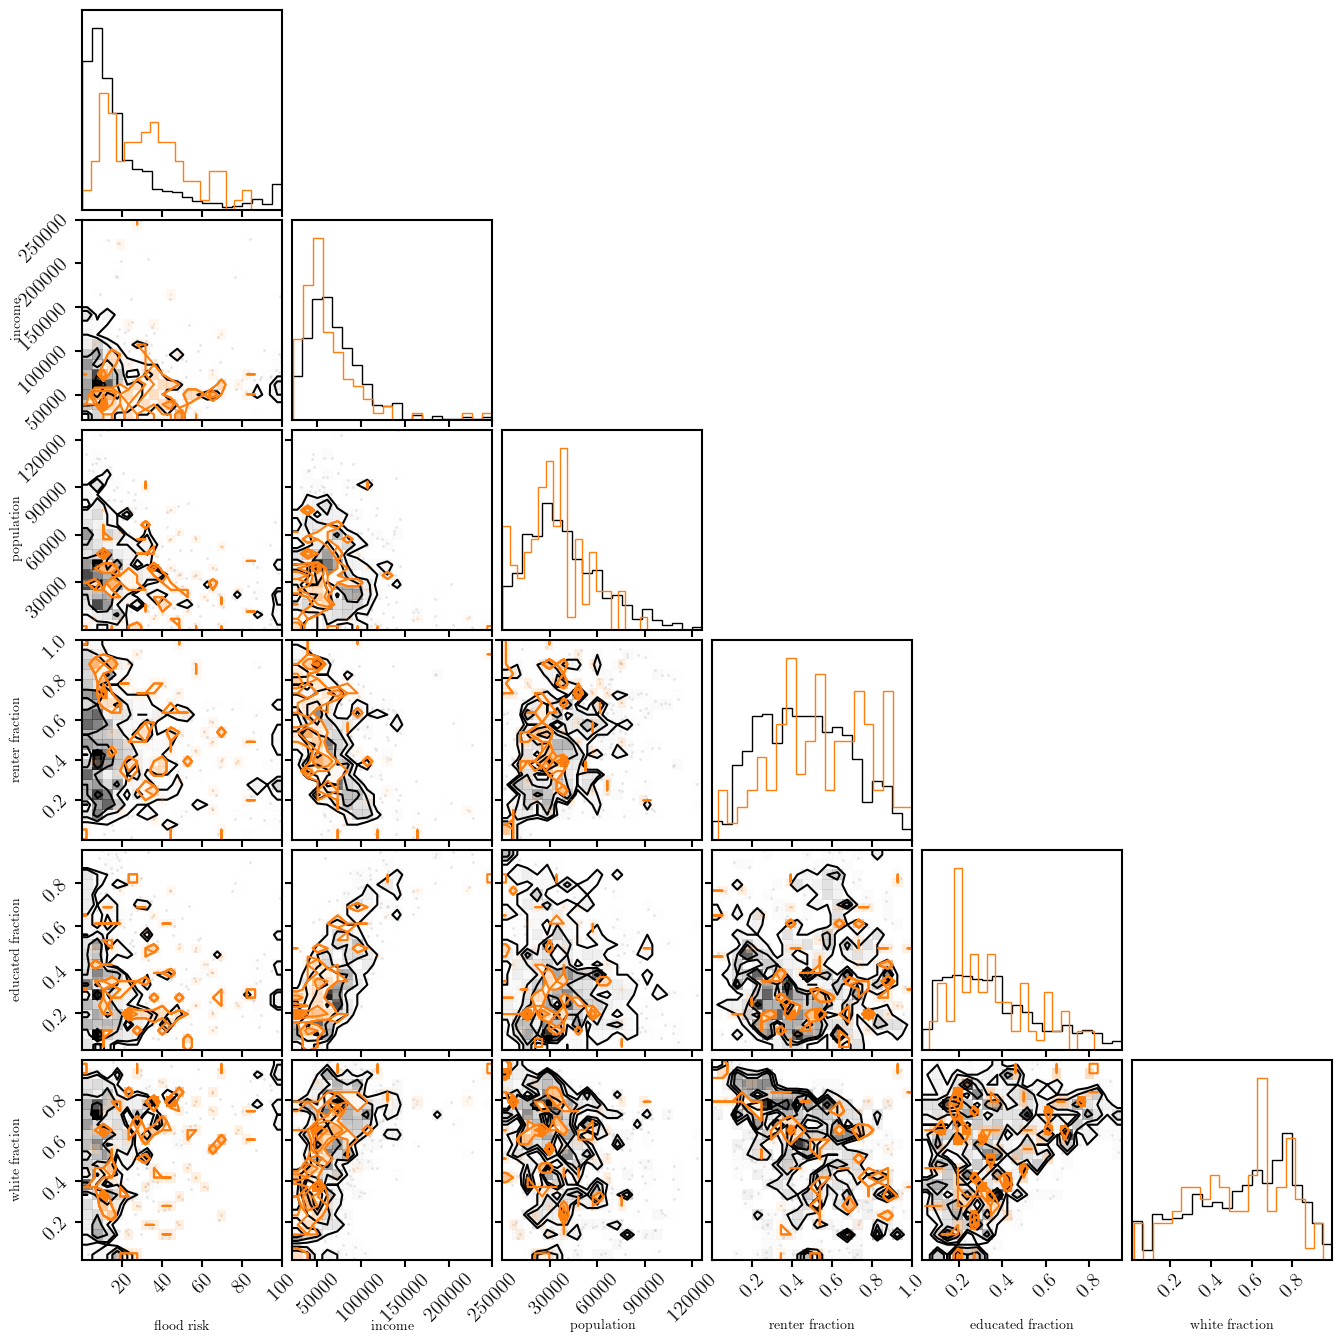

In [84]:
props = np.array([np.array(cities[col]) for col in ['flood_risk100.2022', 'income.2022', 'population.2022', 'renter_fraction.2022', 'educated_fraction.2022', 'white_fraction.2022']]).T
fig = DFM.corner(props, labels=['flood risk', 'income', 'population', 'renter fraction', 'educated fraction', 'white fraction'], 
                hist_kwargs={'density': True})
fig = DFM.corner(props[(cities['crs_saving.2052'] - cities['crs_saving.2022']) < -1000.], labels=['flood risk', 'income', 'population', 'renter fraction', 'educated fraction', 'white fraction'],                 
                 hist_kwargs={'density': True}, color='C1', fig=fig)
#DFM.overplot_points(fig, props[(cities['crs_saving.2052'] - cities['crs_saving.2022']) < 0.], color='C1')